In [48]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import integrate

In [49]:
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.titlesize'] = 13

# 1.Euler Method

### First Order Differential Equation

let: $\frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y)$
$$\because \frac{\mathrm{d}y}{\mathrm{d}t} = \frac{y(t+h)-y(t)}{h}$$ 
$$ y(t+h) = \frac{\mathrm{d}y}{\mathrm{d}t}h + y(t)$$

Therefore, we can repetitively iterate the propagation: 
$$ y_{n+1} = y_n + \frac{\mathrm{d}y}{\mathrm{d}t}h$$
$$y_{n+1} = y_n + f(t,y_n) h $$

### Defining A Function 

In [50]:
def eulerMethod(f,t0,y0,h,nMax): 
    #f: function (dy/dt)
    #t0: starting time
    #y0: initial value
    #h: step size
    #nMax: number of iterations
    tArray=[t0]
    yArray=[y0]
    time=t0
    y=y0
    for i in range(1,nMax+1):
        y=y+f(time,y)*h
        time=time+h
        yArray.append(y)
        tArray.append(time)
    return np.array([tArray,yArray])

### Defining A Plotting Function

In [51]:
def plotting(xlabeling, ylabeling,numericalArray,analyticalArray,label1, label2):
    plt.ylabel(xlabeling)
    plt.xlabel(ylabeling)
    plt.scatter(numericalArray[0],numericalArray[1],label=label1)
    plt.plot(analyticalArray[0],analyticalArray[1],color='red',label=label2)
    plt.legend()

### Example 1: Radioactive Decay 

$$ \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y) = -y$$

Analytical solution: $ y(t)=y_0 e^{-(t-t_{0})}$

In [52]:
def f(t,y):
    return -y

301


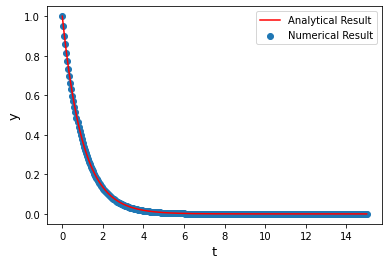

In [53]:
t0=0
y=1
h=0.05
nMax=300
radioActive=eulerMethod(f,t0,y,h,nMax)
print(len(radioActive[1]))
analyticalRadio=np.array([np.linspace(t0,nMax*h,nMax+1),1*np.exp(-np.linspace(0,nMax*h,nMax+1))]) 

plotting('y','t',radioActive,analyticalRadio,'Numerical Result','Analytical Result')

### Example 2: Time Amplified Decay

$$ \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y) = -a y t $$

Analytical solution: $ y(t)=y_0 e^{a/2(-t^2 + t_{0}^2)}$

In [54]:
def f(t,y):
    return -a*y*t

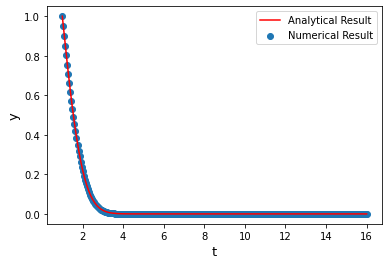

In [96]:
t0=1
y0=1
h=0.05
nMax=300
a=1

timeDecay=eulerMethod(f,t0,y0,h,nMax)
analyticalTime=np.array([np.linspace(t0,t0+nMax*h,nMax+1),y0*np.exp(0.5*  a *(-np.linspace(t0,t0+nMax*h,nMax+1)**2+t0**2))])

plotting('y','t',timeDecay,analyticalTime,'Numerical Result','Analytical Result')

## 1.2 Higher-Order Differential Equations

Example: Second-order differential equation: $$ y''(t) = f\left(t,y(t),y'(t)\right)$$

Let: $ z_0(t) = y(t)$ and $ z_1(t) = y'(t)$

$$ \begin{pmatrix}z_0'(t)\\z_1'(t)\end{pmatrix}=\begin{pmatrix}z_1(t)\\f\left(t,z_0(t),z_1(t)\right)\end{pmatrix}$$

Therefore, we can describe the second-order differential equation by a set of two first-order differential equations.

$$ z_0^{(n+1)} = z_0^{(n)} + z_1^{(n)} h $$

$$ z_1^{(n+1)} = z_1^{(n)} + f\left(t,z_0^{(n)},z_1^{(n)}\right) h $$

Substituting back:
$$\therefore y_{n+1} = y_{n} + y'_{n} h $$

$$ y'_{n+1} = y'_{n} + f\left(t,y_{n},y'_{n}\right) h $$

In [56]:
def secondEulerMethod(f,t0,y0,dy0,h,nMax):
    #f: function (y'')
    #t0: starting time
    #y0: initial value of y(t)
    #dy0: initial value of y'(t)
    #h: step size
    #nMax: number of iterations
    tArray=[t0]
    yArray=[y0]
    dyArray=[dy0]
    time=t0
    y=y0
    dy=dy0
    for i in range(1,nMax+1):
        y=y+dy*h
        dy=dy+f(time,y,dy)*h
        time=time+h
        yArray.append(y)
        dyArray.append(dy)
        tArray.append(time)
    return np.array([tArray,yArray,dyArray])

## Example 1: Free Fall

$$ \frac{\mathrm{d}^2y}{\mathrm{d}t^2} = f(t,y,\dot{y}) = -g$$

Analytical solution: $ y(t)=-\frac{g}{2}t^2+v_0t+y_0$

In [57]:
def f(t,y,dy):
    return -g

In [58]:
g=9.81
t0=0
y0=15
dy0=80
h=0.1
nMax=200
freeFall=secondEulerMethod(f,t0,y0,dy0,h,nMax)
time=np.linspace(0,nMax*h,nMax+1)
analyticalFall=np.array([time,-0.5*g*time**2+dy0*time+y0])

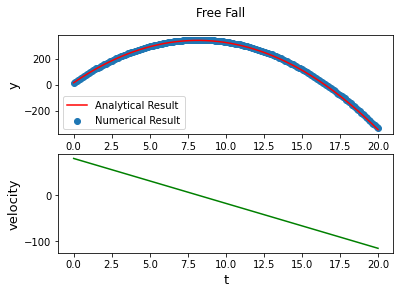

In [59]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Free Fall')
ax1.set_ylabel('y')
ax1.set_xlabel('t')
ax1.scatter(freeFall[0],freeFall[1],label='Numerical Result')
ax1.plot(analyticalFall[0],analyticalFall[1],color='red',label='Analytical Result')
ax2.set_ylabel('velocity')
ax2.set_xlabel('t')
ax2.plot(freeFall[0],freeFall[2],color='green')
ax1.legend()

### Example 2: Pendulum motion

$$ \theta''(t) + b\theta'(t) + c\sin(\theta(t)) = 0 $$

where:

$ b $: the damping parameter 

$ c $: determined by the pendulum length ($ c = \frac{g}{l} $)

### Small-angle Approximation

For small angles $ \theta\ll 1  \quad (sin(\theta)=\theta )$ and without damping (b = 0), we have 

$$ \theta''(t) = - \frac{g}{l}\theta(t) \quad \text{with the solution for }(\theta'(0) = 0) $$

$$ \theta(t) = \theta_0\cos\left(\sqrt{\frac{g}{l}}t\right) \quad \text{and a period of } \left( T = 2\pi\sqrt{\frac{l}{g}}\quad \right) $$

In [60]:
#small angle approximation
def f(t,theta,dTheta):
    return -b*dTheta -c * theta

length=2
g=9.81
c=g/length
b=0

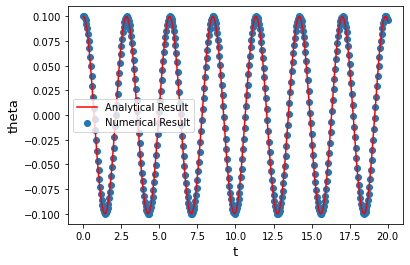

In [61]:
t0=0
theta0=0.1 #(<<1)
dTheta0=0
h=0.05
nMax=400
smallAngle=secondEulerMethod(f,t0,theta0,dTheta0,h,nMax)
time=np.linspace(0,nMax*h,nMax+1)
analyticalSmallAngle=np.array([time,theta0*np.cos(np.sqrt(c)*time)])

plotting('theta','t',smallAngle,analyticalSmallAngle,'Numerical Result','Analytical Result')

### Solving The Actual Equation

Not going for the small angle approximation will make the equation very difficult to solve analytically (nearly impossible) However, we can work out the answer numerically.

In [62]:
def f(t,theta,dTheta):
    return -b*dTheta -c * np.sin(theta)

* Small Starting Angle

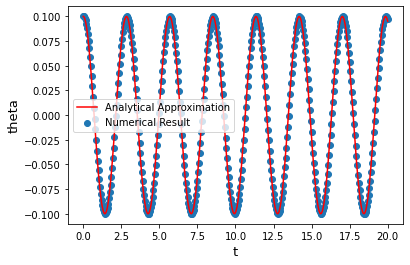

In [63]:
t0=0
theta0=0.1 #(<<1)
dTheta0=0
h=0.05
nMax=400
numericalPendulumSmall=secondEulerMethod(f,t0,theta0,dTheta0,h,nMax)
# You can see that the small angle approximation is valid.

plotting('theta','t',numericalPendulumSmall,analyticalSmallAngle,'Numerical Result','Analytical Approximation')

* Large Starting Angle

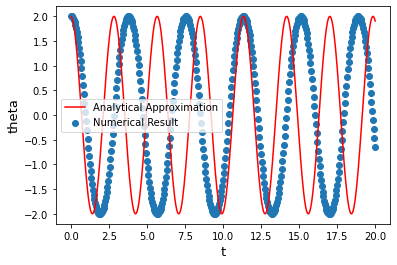

In [64]:
theta0=2
numericalPendulumBig=secondEulerMethod(f,t0,theta0,dTheta0,h,nMax)
time=np.linspace(0,nMax*h,nMax+1)
nonValidSmallAngle=np.array([time,theta0*np.cos(np.sqrt(c)*time)])
plotting('theta','t',numericalPendulumBig,nonValidSmallAngle,'Numerical Result','Analytical Approximation')
# As you can see analytical approximation isn't valid for large starting angles

* Adding A Damping Factor

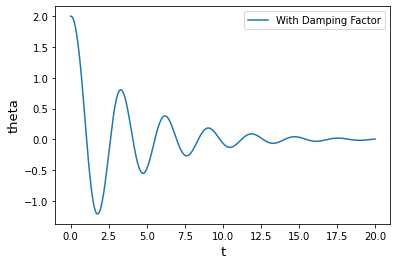

In [65]:
b=0.5
numericalPendulumDamping=secondEulerMethod(f,t0,theta0,dTheta0,h,nMax)
plt.ylabel('theta')
plt.xlabel('t')
plt.plot(numericalPendulumDamping[0],numericalPendulumDamping[1],label='With Damping Factor')
plt.legend()

* Adding A Driving Force (Most General Case)

In [66]:
def f(t,theta,dTheta):
    return -b*dTheta -c * np.sin(theta) -d * np.sin(omega*t)
# d sin(wt): driving force factor

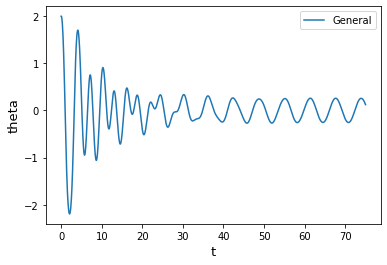

In [67]:
d=1
b=0.2
omega=1
nMax=1500
numericalPendulumGeneral=secondEulerMethod(f,t0,theta0,dTheta0,h,nMax)
plt.ylabel('theta')
plt.xlabel('t')
plt.plot(numericalPendulumGeneral[0],numericalPendulumGeneral[1],label='General')
plt.legend()
# It looks chatoic at the beginning, then periodic after a while according to sin(wt) 

# 2. Using Scipy 

Solving the examples we did earlier, but this time using the "scipy.integrate.solve_ivp" method.

#### Define a plot scipy function

In [68]:
def plotScipy(xlabeling, ylabeling,numericalEulerArray,numericalScipyArray,analyticalArray,label1, label2,label3,title):
    fig, (ax1, ax2) = plt.subplots(2)
    fig.suptitle(title)
    ax1.set_ylabel(ylabeling)
    ax1.set_xlabel(xlabeling)
    ax1.scatter(numericalScipyArray.t,numericalScipyArray.y[0],label=label1)
    ax1.plot(analyticalArray[0],analyticalArray[1],color='red',label=label2)
    ax2.set_ylabel(ylabeling)
    ax2.set_xlabel(xlabeling)
    ax2.scatter(numericalEulerArray[0],numericalEulerArray[1],color='green',label=label3)
    ax2.plot(analyticalArray[0],analyticalArray[1],color='red',label=label2)
    ax1.legend()
    ax2.legend()

### Radioactive Decay

In [69]:
def f(t,y):
    return -y

In [70]:
t0=0
tFinal=15
y0=1
radioActiveScipy=integrate.solve_ivp(f,[t0,tFinal],[y0],method='RK45')
#first argument is the function
#second argment is the time interval [starting time, ending time]
#third argument is the initial values [y0]
#fourth argument is optional, we will use the RK45 method, which we will implement later on

#since we defined the time interval for this example earlier (when we used the euler method) to be between 0 and 2
#we will keep it the same here

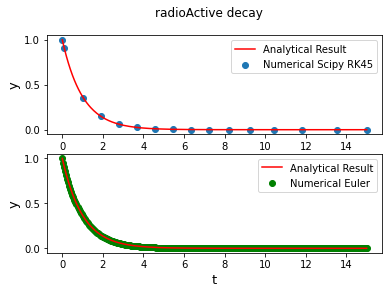

In [71]:
plotScipy('t','y',radioActive,radioActiveScipy,analyticalRadio,'Numerical Scipy RK45','Analytical Result',
          'Numerical Euler','radioActive decay')
#you can notice that there are very few points, which means that the computitional speed is much higher
#and the important thing is that the starting and ending points are accurate.

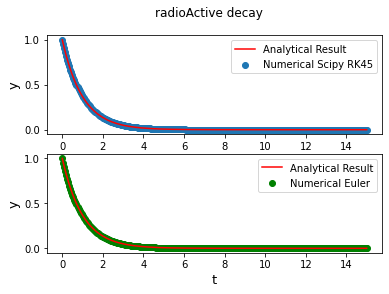

In [72]:
#if you want to add more points as we did earlier in our defined euler method
#you can add a fifth argument that spicifes the number of points as following
nMax=300
h=0.05
radioActiveScipy2=integrate.solve_ivp(f,[t0,tFinal],[y0],method='RK45',t_eval=np.linspace(0,nMax*h,nMax+1))
plotScipy('t','y',radioActive,radioActiveScipy2,analyticalRadio,'Numerical Scipy RK45',
          'Analytical Result','Numerical Euler','radioActive decay')

### Time Amplified Decay

In [73]:
def f(t,y):
    return -a*y*t

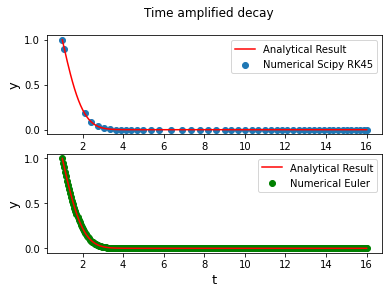

In [74]:
t0=1
tFinal= 16
y0=1
a=1
timeScipy=integrate.solve_ivp(f,[t0,tFinal],[y0],method='RK45')
plotScipy('t','y',timeDecay,timeScipy,analyticalTime,'Numerical Scipy RK45',
          'Analytical Result','Numerical Euler','Time amplified decay')
#you can add more point if you want as mentioned earlier.

### Free Fall

Trying scipy method with 2nd order differential equation

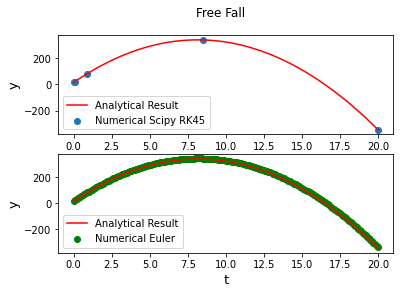

In [75]:
g=9.81
t0=0
tFinal=20
y0=15
dy0=80

#remember the function we defined for free fall:
#def f(t,y,dy):
    #return -g
# we will have to edit it to suit the scipy method
def f(t,initialValues):
    #initialValues is a list of [y0,dy0]
    return initialValues[1], -g
    #remeber that: y{n+1} = y{n} + y'{n}*h 
    #              y'{n+1} = y'{n} + f(t,y{n},y'{n}) * h
    # we have 2 equations as this is a 2nd order, so we need to return 2 values. the y' and y''

freeFallScipy=integrate.solve_ivp(f,[t0,tFinal],[y0,dy0],method='RK45')

plotScipy('t','y',freeFall,freeFallScipy,analyticalFall,'Numerical Scipy RK45','Analytical Result','Numerical Euler','Free Fall')
#we can add more points if we want, as we did earlier


### Pendulum

In [76]:
# let's test the most general case
def f(t,intialValues):
    return intialValues[1],-b*intialValues[1] -c * np.sin(intialValues[0]) -d * np.sin(omega*t)

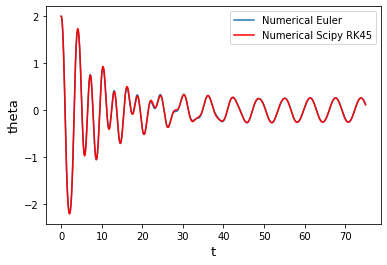

In [77]:
theta0=2
dThet0=0
d=1
b=0.2
omega=1
h=0.05
nMax=1500
t0=0
tFinal=80
numericalPendulumScipy=integrate.solve_ivp(f,[t0,tFinal],[theta0,dTheta0],method='RK45',t_eval=np.linspace(0,nMax*h,nMax+1))
#as this is somewhat a complicated plot, I will add all the points to be able to see their behaviour.
plt.ylabel('theta')
plt.xlabel('t')
plt.plot(numericalPendulumGeneral[0],numericalPendulumGeneral[1],label="Numerical Euler")
plt.plot(numericalPendulumScipy.t,numericalPendulumScipy.y[0],color='red',label="Numerical Scipy RK45")
plt.legend()

### Comparing Accuracy

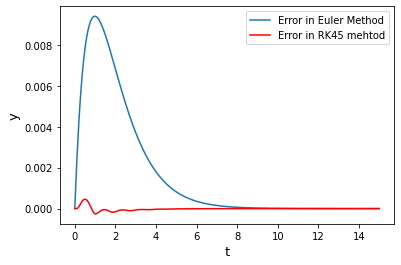

In [105]:
#we will use radio-active decay first to compare
plt.ylabel('y')
plt.xlabel('t')
plt.plot(analyticalRadio[0],analyticalRadio[1]-radioActive[1],label="Error in Euler Method")
plt.plot(analyticalRadio[0],analyticalRadio[1]-radioActiveScipy2.y[0],color='red',label="Error in RK45 mehtod")
plt.legend()
#although both gives very good approximations, we can see that RK45 is more accurate.


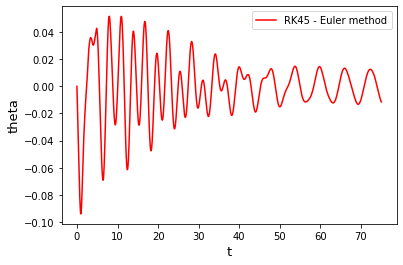

In [79]:
plt.ylabel('theta')
plt.xlabel('t')
plt.plot(numericalPendulumScipy.t,numericalPendulumScipy.y[0]-numericalPendulumGeneral[1],color='red',label="RK45 - Euler method")
plt.legend()
#In the pendulum complicated plot, let's see how much our defined function (the Euler method function) deviates from 
#the scipy RK45, since we couldn't compare it to an analytical solution

#as seen there is some differencem although it's not much (the max error is 0.1)

## 3.The Runge-Kutta methods 

There exist several different Runge-Kutta methods, and they are more accurate than the Euler method, and work better with fewer data points as well (as you have seen when using the scipy method)

Derivation: https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#Derivation_of_the_Runge%E2%80%93Kutta_fourth-order_method

* Implementing Rk4

In [80]:
#[https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods#Classic_fourth-order_method]
def rk4(f,t0,y0,h,nMax): 
    #f: function (dy/dt)
    #t0: starting time
    #y0: initial value
    #h: step size
    #nMax: number of iterations
    tArray=[t0]
    yArray=[y0]
    time=t0
    y=y0
    for i in range(1,nMax+1):
        k1=f(time,y)*h
        k2=f(time + h/2,y + k1/2)*h
        k3=f(time+ h/2,y + k2/2)*h
        k4=f(time+ h,y + k3)*h
        k=1/6 * k1+ 1/3 *k2+ 1/3 *k3+ 1/6*k4
        y=y+k
        time=time+h
        yArray.append(y)
        tArray.append(time)
    return np.array([tArray,yArray])

* Implementing Rk45

In [94]:
# [https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods#Fehlberg]
#we will implement the 5th order from the above link, as it gives higher accuracy.
def rk45(f,t0,y0,h,nMax): 
    #f: function (dy/dt)
    #t0: starting time
    #y0: initial value
    #h: step size
    #nMax: number of iterations
    tArray=[t0]
    yArray=[y0]
    time=t0
    y=y0
    for i in range(1,nMax+1):
        k1=f(time, y)*h
        k2=f(time + h/4, y + k1/4)*h
        k3=f(time+ 3*h/8, y + 3*k1/32 + 9*k2/32)*h
        k4=f(time+ 12*h/13, y + 1932*k1/2197 -7200*k2/2197 + 7296*k3/2197)*h
        k5=f(time + h, y+ 439*k1/216 -8*k2 +3680*k3/513 -845*k4/4104)*h
        k6=f(time +h/2, y -8*k1/27 + 2*k2 -3544*k3/2565 +1859*k4/4104 -11*k5/40)*h
        
        k=16/135 * k1+ 6656/12825 *k3+ 28561/56430*k4 -9/50 *k5 +2/55 *k6
        y=y+k
        time=time+h
        yArray.append(y)
        tArray.append(time)
    return np.array([tArray,yArray])

## 4.Comparing Methods

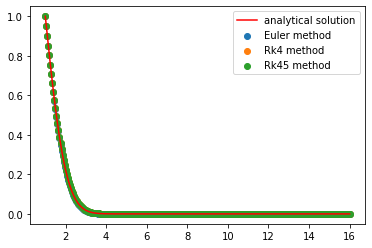

In [102]:
# We will use the time amplified example to compare, as it's more complicated than the radio active decay
def f(t,y):
    return -a*y*t
t0=1
y0=1
h=0.05
nMax=300
a=1

timeEuler=timeDecay
timeRk4=rk4(f,t0,y0,h,nMax)
timeRk45=rk45(f,t0,y0,h,nMax)
plt.plot(analyticalTime[0],analyticalTime[1],label='analytical solution',color='red')
plt.scatter(timeEuler[0],timeEuler[1],label='Euler method')
plt.scatter(timeRk4[0],timeRk4[1],label='Rk4 method')
plt.scatter(timeRk45[0],timeRk45[1],label='Rk45 method')

plt.legend()

* Comparing the 3 mehtods

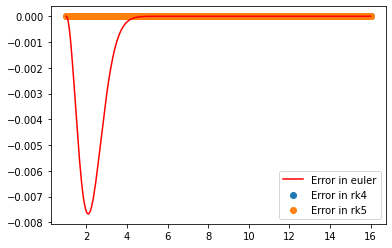

In [106]:
plt.plot(timeEuler[0],timeEuler[1]-analyticalTime[1],label='Error in euler',color='red')
plt.scatter(timeRk4[0],timeRk4[1]-analyticalTime[1],label='Error in rk4')
plt.scatter(timeRk45[0],timeRk45[1]-analyticalTime[1],label='Error in rk5')
plt.legend()

#as shown, the error in euler mehtod is bigger than the other 2 

* Comparing Rk4 and Rk5 methods

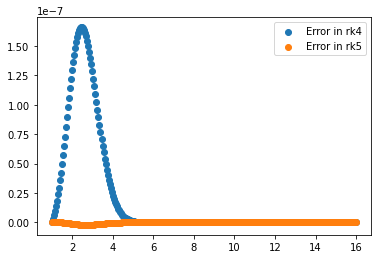

In [101]:
plt.scatter(timeRk4[0],timeRk4[1]-analyticalTime[1],label='Error in rk4')
plt.scatter(timeRk45[0],timeRk45[1]-analyticalTime[1],label='Error in rk5')
plt.legend()
#as shown, the error in rk4 is higher, although they are both very accurate.